In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [161]:
import sklearn
data = pd.read_csv('Crop_recommendation.csv')
cropName = data[['label']].copy()
l = cropName['label'].unique()
i = 0
d = {}
for s in l:
    d[s] = i
    i+=1
#print(d)
y=[]
for j in cropName['label']:
    y.append(d[j])
print(type(y))
x=data.iloc[:,:-1]
# x = np.array(x)
print(type(x))
print(l)


<class 'list'>
<class 'pandas.core.frame.DataFrame'>
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=104, test_size=0.25, shuffle=True)


In [146]:
from sklearn import tree
from sklearn import metrics

In [151]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

In [156]:
model.predict(X_test)

array([ 8,  5,  9,  8,  8, 13, 11, 19,  6, 19,  6, 19,  4, 20, 12,  1, 21,
       14, 18, 13, 17,  4,  0,  3,  0, 13, 17, 16, 10,  7, 15,  2, 17,  8,
       10, 16, 20, 12,  2, 17,  0,  4,  8,  3, 21, 20,  6, 12,  8,  8,  9,
       13, 13, 16,  7,  3, 21, 21,  1, 11, 17,  9,  2,  3, 13,  1, 13, 12,
        3, 14,  8, 11,  3, 12,  1,  5, 18,  8, 11, 10,  0, 16, 20,  0, 11,
        2,  1, 21,  8, 19,  1, 18,  4, 19,  8,  2, 14, 18, 17,  5,  8, 14,
        3, 18, 15, 15, 20,  5, 20, 20,  7, 10, 18,  6,  4, 20, 16,  7,  4,
       20, 10,  8, 10, 20,  5, 21, 11, 16, 18,  4,  8,  2, 17,  0, 13, 16,
       11,  4,  9,  4, 17, 13, 16,  4,  5,  8, 20, 17, 21,  2, 10, 15, 19,
        7, 14, 20, 20, 12,  8,  9,  0,  1, 14, 21,  0,  6,  3, 14, 14, 16,
       16, 19,  7,  2,  5,  7,  3,  8, 16, 15,  1, 19, 14,  4,  3, 13,  9,
       10, 10, 16,  5, 14, 18, 13, 14,  5, 12, 13, 12,  9, 21,  8,  7, 20,
       13,  1, 16,  2,  4, 13, 10, 15,  2,  6,  9, 11, 18, 12,  6,  7, 18,
       21, 20, 11, 12,  5

In [158]:
print("Predicted: ", model.predict(X_test.iloc[150:151, :]))
print("Actual: ",   Y_test[150])

Predicted:  [10]
Actual:  10


In [159]:
metrics.accuracy_score(Y_test,model.predict(X_test))

0.9854545454545455

In [139]:
from joblib import dump

In [140]:
dump(model, 'CRS.joblib')

['CRS.joblib']

In [141]:
import matplotlib.pyplot

[Text(0.4983108108108108, 0.9722222222222222, 'x[2] <= 140.0\ngini = 0.954\nsamples = 1650\nvalue = [74, 74, 71, 77, 71, 77, 71, 78, 71, 74, 74, 80\n76, 64, 76, 80, 66, 84, 79, 82, 73, 78]'),
 Text(0.44425675675675674, 0.9166666666666666, 'x[6] <= 30.393\ngini = 0.95\nsamples = 1494\nvalue = [74, 74, 71, 77, 71, 77, 71, 78, 71, 74, 74, 80\n0, 64, 76, 0, 66, 84, 79, 82, 73, 78]'),
 Text(0.47128378378378377, 0.9444444444444444, 'True  '),
 Text(0.4172297297297297, 0.8611111111111112, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n76, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.47128378378378377, 0.8611111111111112, 'x[4] <= 27.685\ngini = 0.947\nsamples = 1418\nvalue = [74, 74, 71, 77, 71, 77, 71, 78, 71, 74, 74, 80\n0, 64, 0, 0, 66, 84, 79, 82, 73, 78]'),
 Text(0.34459459459459457, 0.8055555555555556, 'x[2] <= 50.0\ngini = 0.499\nsamples = 148\nvalue = [0, 0, 71, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.31756756756756754, 0.75, 'gini = 0.0\

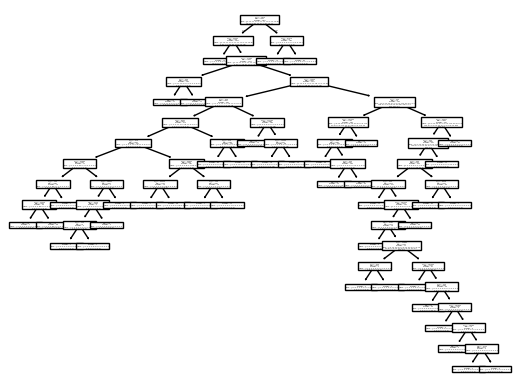

In [ ]:
tree.plot_tree(model)